CTU-UHB Intrapartum Cardiotocography Database (Feb. 18, 2014)

This collection of 552 CTGs from the Czech Technical University (CTU) in Prague and the University Hospital in Brno (UHB) was carefully selected from 9164 recordings recently collected at UHB. Each recording is up to 90 minutes long, and includes a fetal heart rate time series, a uterine contraction signal, and maternal, delivery, and fetal clinical details.



In [ ]:
!pip install wfdb

In [ ]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
record_id = "1001"
data_dir='/content/drive/MyDrive/Msc/Other Projects/RAJA/ctu-chb-intrapartum-cardiotocography-database-1.0.0'
record = wfdb.rdrecord(f"{data_dir}/{record_id}")
record.__dict__

{'record_name': '1001',
 'n_sig': 2,
 'fs': 4,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 19200,
 'base_time': None,
 'base_date': None,
 'comments': ['----- Additional parameters for record 1001',
  '-- Outcome measures',
  'pH           7.14',
  'BDecf        8.14',
  'pCO2         7.7',
  'BE           -10.5',
  'Apgar1       6',
  'Apgar5       8',
  '-- !NotReadyYet! Neonatology outcome measures !NotReadyYet!',
  'NICU days    0',
  'Seizures     0',
  'HIE          0',
  'Intubation   0',
  'Main diag.   0',
  'Other diag.  0',
  '-- Fetus/Neonate descriptors',
  'Gest. weeks  37',
  'Weight(g)    2660',
  'Sex          2',
  '-- Maternal (risk-)factors',
  'Age          32',
  'Gravidity    1',
  'Parity       0',
  'Diabetes     1',
  'Hypertension 0',
  'Preeclampsia 0',
  'Liq. praecox 1',
  'Pyrexia      0',
  'Meconium     0',
  '-- Delivery descriptors',
  'Presentation 2',
  'Induced      0',
  'I.stage      232',
  'NoProgress   0',
  'CK/KP        0',
  '

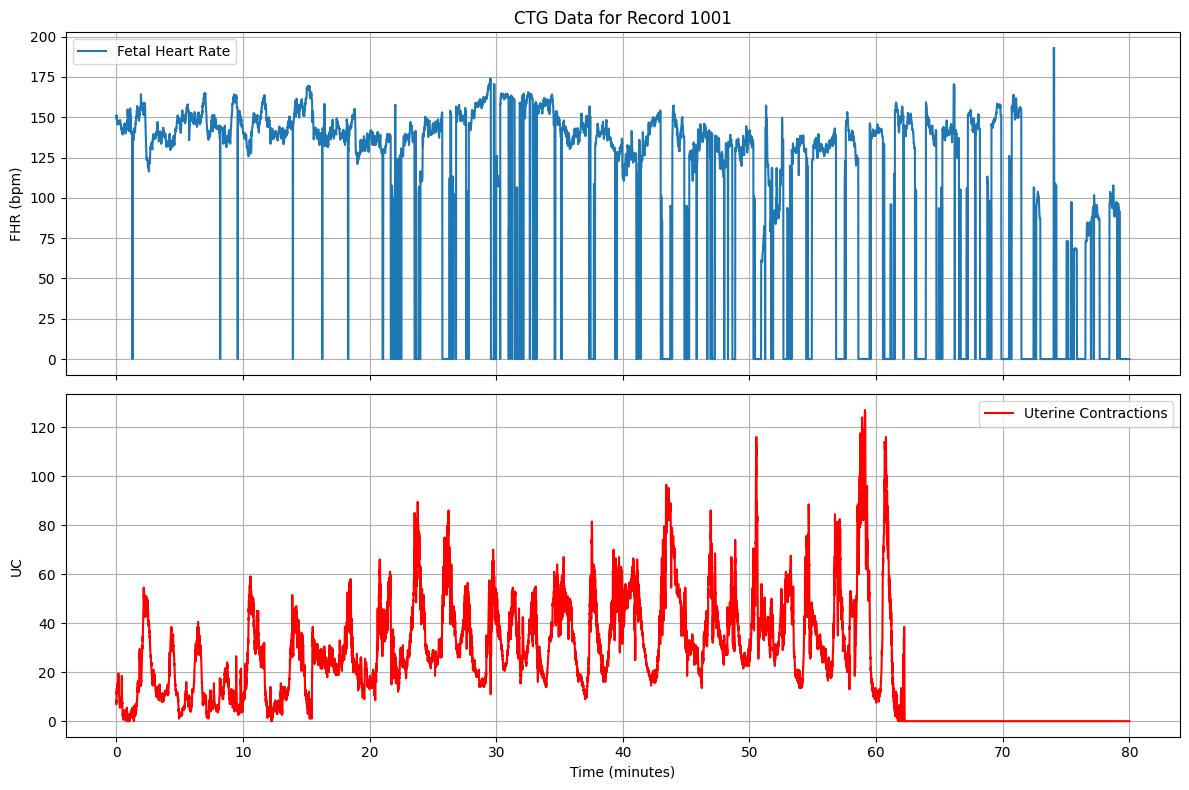

Record: 1001
Duration: 80.00 minutes
Sampling frequency: 4 Hz
Signal names: ['FHR', 'UC']


In [ ]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

record_id = "1001"
data_dir='/content/drive/MyDrive/Msc/Other Projects/RAJA/ctu-chb-intrapartum-cardiotocography-database-1.0.0'
record = wfdb.rdrecord(f"{data_dir}/{record_id}")

def visualize_ctg_data(record):
    """
    Visualize CTG data from .dat and .hea files for a given record ID.

    Parameters:
    - record_id (str): The ID of the record to visualize.
    - data_dir (str): Directory where the data files are stored.

    Returns:
    None (displays a plot)
    """
    try:
        # Read the signal data

        # Extract signal data and time
        time = np.arange(len(record.p_signal)) / record.fs / 60  # Convert to minutes
        fhr = record.p_signal[:, 0]  # Fetal Heart Rate
        uc = record.p_signal[:, 1]   # Uterine Contractions

        # Create the plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

        # Plot Fetal Heart Rate
        ax1.plot(time, fhr, label='Fetal Heart Rate')
        ax1.set_ylabel('FHR (bpm)')
        ax1.set_title(f'CTG Data for Record {record.record_name}')
        ax1.legend()
        ax1.grid(True)

        # Plot Uterine Contractions
        ax2.plot(time, uc, label='Uterine Contractions', color='red')
        ax2.set_xlabel('Time (minutes)')
        ax2.set_ylabel('UC')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

        # Print some additional information
        print(f"Record: {record_id}")
        print(f"Duration: {len(record.p_signal) / record.fs / 60:.2f} minutes")
        print(f"Sampling frequency: {record.fs} Hz")
        print(f"Signal names: {record.sig_name}")

    except Exception as e:
        print(f"Error processing record {record_id}: {str(e)}")

# Example usage
visualize_ctg_data(record)  # Replace '1001' with any valid record ID

In [ ]:
import os

def read_records(data_dir):
  """
  Iterates through .dat files in data_dir, reads them using wfdb,
  and stores them in a dictionary.

  Args:
    data_dir: The directory containing the .dat files.

  Returns:
    A dictionary where keys are filenames (without extension) and
    values are wfdb.Record objects.
    Returns an empty dictionary if no .dat files are found or an error occurs.
  """
  records = {}
  for filename in os.listdir(data_dir):
    if filename.endswith(".dat"):
      record_id = filename[:-4]  # Remove the .dat extension
      try:
        record = wfdb.rdrecord(os.path.join(data_dir, record_id))
        records[record_id] = record
      except Exception as e:
        print(f"Error reading {filename}: {e}")
  return records

# Example usage (assuming data_dir is defined as in your previous code)
data_dir = '/content/drive/MyDrive/Msc/Other Projects/RAJA/ctu-chb-intrapartum-cardiotocography-database-1.0.0'
all_records = read_records(data_dir)

# Access a specific record (e.g., '1001')
if '1001' in all_records:
  record_1001 = all_records['1001']
  # print(record_1001.__dict__) # or other operations on the record
else:
  print("Record '1001' not found.")

# Iterate through all records and collect sig_len
sig_lens = {}
for record_id, record in all_records.items():
    if  len(record.p_signal) != record.sig_len:
        print(f"Warning: sig_len for {record_id} does not match p_signal length.")
        break
    sig_lens[record_id] = len(record.p_signal)



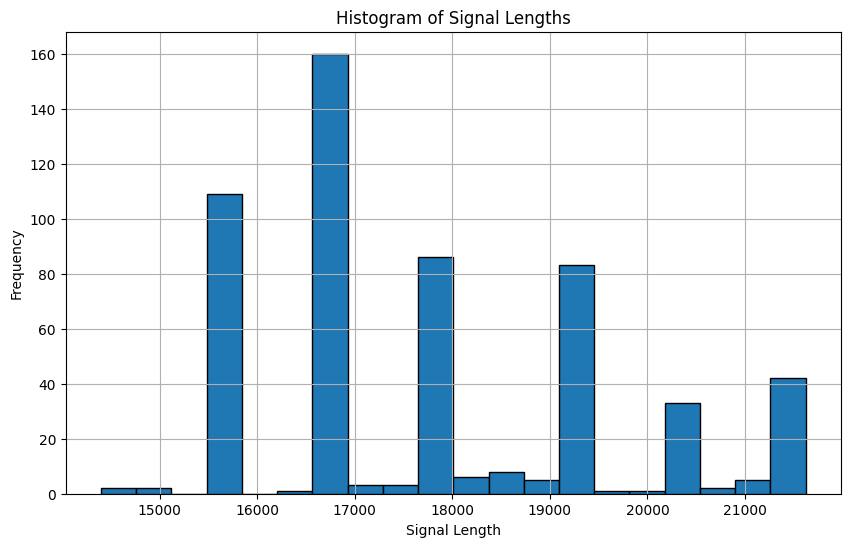

In [ ]:
# plot sig_lens as histogram

import matplotlib.pyplot as plt

# Assuming sig_lens is a dictionary where keys are record IDs and values are signal lengths
# Create a list of signal lengths
sig_lens_values = list(sig_lens.values())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sig_lens_values, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Signal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Signal Lengths')
plt.grid(True)
plt.show()


In [ ]:
record_1001.record_name

'1001'

In [ ]:
record_1001.comments

['----- Additional parameters for record 1001',
 '-- Outcome measures',
 'pH           7.14',
 'BDecf        8.14',
 'pCO2         7.7',
 'BE           -10.5',
 'Apgar1       6',
 'Apgar5       8',
 '-- !NotReadyYet! Neonatology outcome measures !NotReadyYet!',
 'NICU days    0',
 'Seizures     0',
 'HIE          0',
 'Intubation   0',
 'Main diag.   0',
 'Other diag.  0',
 '-- Fetus/Neonate descriptors',
 'Gest. weeks  37',
 'Weight(g)    2660',
 'Sex          2',
 '-- Maternal (risk-)factors',
 'Age          32',
 'Gravidity    1',
 'Parity       0',
 'Diabetes     1',
 'Hypertension 0',
 'Preeclampsia 0',
 'Liq. praecox 1',
 'Pyrexia      0',
 'Meconium     0',
 '-- Delivery descriptors',
 'Presentation 2',
 'Induced      0',
 'I.stage      232',
 'NoProgress   0',
 'CK/KP        0',
 'II.stage     20',
 'Deliv. type  1',
 '-- Signal information',
 'dbID         974204',
 'Rec. type    1',
 'Pos. II.st.  14400',
 'Sig2Birth    0']

In [ ]:
# Desired keys to extract
desired_keys = {
    'pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5',
    'Gest. weeks', 'Weight(g)', 'Sex', 'Age',
    'Gravidity', 'Parity', 'Diabetes', 'Hypertension',
    'Preeclampsia', 'Liq. praecox', 'Pyrexia', 'Meconium',
    'Presentation', 'Induced', 'I.stage', 'NoProgress',
    'CK/KP', 'II.stage', 'Deliv. type', 'dbID',
    'Rec. type', 'Pos. II.st.', 'Sig2Birth'
}

def extract_comments(record):

    parsed_dict = {}

    for entry in record.comments:
        parts = entry.split(maxsplit=1)  # Split into key and value
        if len(parts) == 2:
            key, value = parts
            if key in desired_keys:
                try:
                    parsed_dict[key] = float(value) if '.' in value else int(value)
                except ValueError:
                    parsed_dict[key] = value  # Keep as string if conversion fails
        if entry.startswith("Deliv"):  # Explicitly handle "Deliv. type"
            key, value = "Deliv. type", entry.split()[-1]  # Extract value correctly
            parsed_dict[key] = int(value)  # Convert to integer
    return parsed_dict


parsed_dict = extract_comments(record_1001)

# Print the final dictionary
print(parsed_dict)

{'pH': 7.14, 'BDecf': 8.14, 'pCO2': 7.7, 'BE': -10.5, 'Apgar1': 6, 'Apgar5': 8, 'Weight(g)': 2660, 'Sex': 2, 'Age': 32, 'Gravidity': 1, 'Parity': 0, 'Diabetes': 1, 'Hypertension': 0, 'Preeclampsia': 0, 'Pyrexia': 0, 'Meconium': 0, 'Presentation': 2, 'Induced': 0, 'I.stage': 232, 'NoProgress': 0, 'CK/KP': 0, 'II.stage': 20, 'Deliv. type': 1, 'dbID': 974204, 'Sig2Birth': 0}


In [ ]:
pH_list = [extract_comments(record)['pH'] for record in all_records.values()]

Weight = [extract_comments(record)['Weight(g)'] for record in all_records.values()]
Weight = [w for w in Weight if w != 'NaN']
Weight = [float(w)/1000 for w in Weight]

Age = [extract_comments(record)['Age'] for record in all_records.values()]
presentation = [extract_comments(record)['Presentation'] for record in all_records.values()]
induced = [extract_comments(record)['Induced'] for record in all_records.values()]
delivery = [extract_comments(record)['Deliv. type'] for record in all_records.values()]

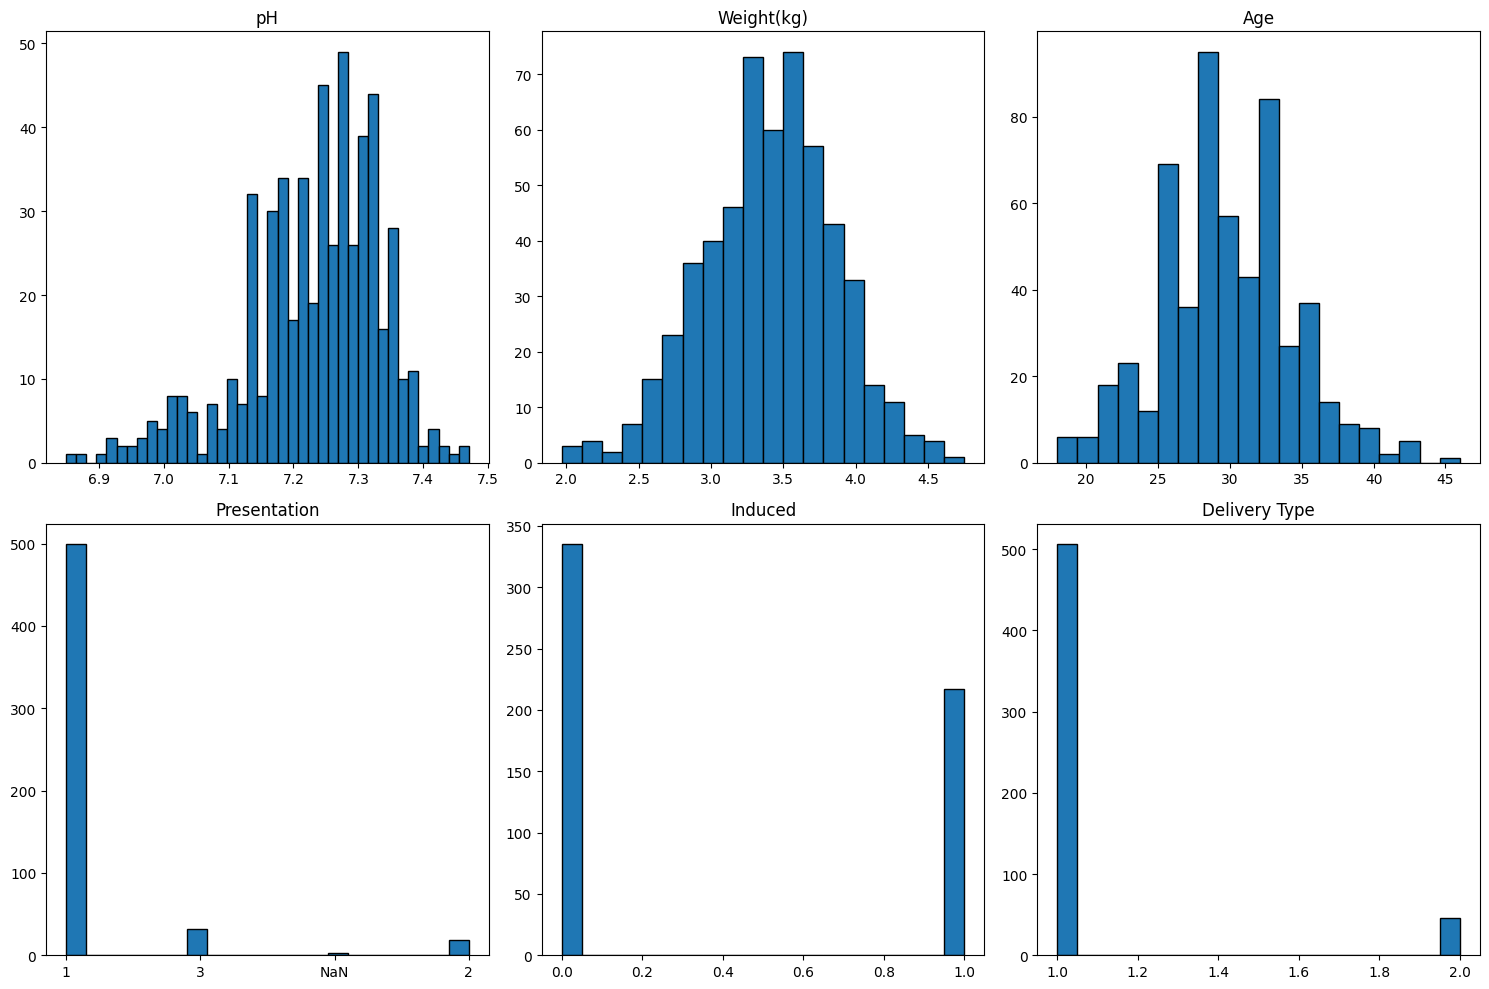

In [ ]:
# prompt: make 2 rows of 3 subplots in each row of hisplots of those lists

import matplotlib.pyplot as plt

# Assuming pH_list, Weight, Age, presentation, induced, and delivery are defined

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].hist(pH_list, bins=40, edgecolor='black')
axes[0, 0].set_title('pH')

axes[0, 1].hist(Weight, bins=20, edgecolor='black')
axes[0, 1].set_title('Weight(kg)')

axes[0, 2].hist(Age, bins=20, edgecolor='black')
axes[0, 2].set_title('Age')

axes[1, 0].hist(presentation, bins=20, edgecolor='black')
axes[1, 0].set_title('Presentation')

axes[1, 1].hist(induced, bins=20, edgecolor='black')
axes[1, 1].set_title('Induced')

axes[1, 2].hist(delivery, bins=20, edgecolor='black')
axes[1, 2].set_title('Delivery Type')


plt.tight_layout()
plt.show()


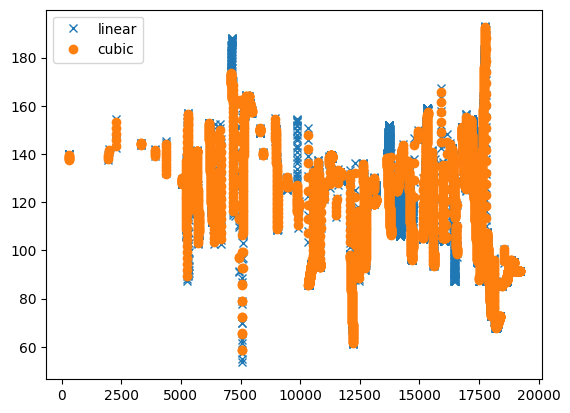

In [ ]:
import numpy as np
import scipy.interpolate as interp
import copy

import numpy as np
import scipy.interpolate as interp

def preprocess_fhr(fhr, fs=4, interpolation = "cubic"):
    """
    Preprocess fetal heart rate (FHR) data:
    1. Replace extreme values (>210 or <50) and NaNs with 0.
    2. Use cubic spline interpolation for missing (zero) values.

    Parameters:
        fhr (numpy array): The fetal heart rate time series.
        max_missing_duration (int): Maximum duration for interpolation in seconds.

    Returns:
        numpy array: The preprocessed FHR data.
    """
    max_missing_duration=10*60*fs

    # deep copy fhr
    fhr = copy.deepcopy(fhr)

    time = np.arange(len(fhr))

    # Identify missing values (NaNs)
    missing_mask = np.isnan(fhr)

    # Identify extreme values (above 210 or below 50)
    extreme_mask = (fhr > 210) | (fhr < 50)

    # Replace extreme values and NaNs with 0
    fhr[missing_mask | extreme_mask] = 0

    # Identify all zero values for interpolation
    zero_mask = fhr == 0

    # Find valid (nonzero) values
    valid_idx = np.where(fhr != 0)[0]

    if interpolation == "cubic":
        if len(valid_idx) > 3:  # Need at least 4 points for cubic interpolation
            interpolator = interp.CubicSpline(valid_idx, fhr[valid_idx])
            fhr[zero_mask] = interpolator(np.where(zero_mask)[0])
    else:
        if len(valid_idx) > 1:  # Ensure there are at least two points for interpolation
            interpolator = interp.interp1d(valid_idx, fhr[valid_idx], kind='linear', bounds_error=False, fill_value="extrapolate")
            fhr[zero_mask] = interpolator(np.where(zero_mask)[0])

    return fhr


processed_fhr = copy.deepcopy(record_1001.p_signal[:, 0])

processed_record_1001 = copy.deepcopy(record_1001)

linear = preprocess_fhr(processed_fhr)
cubic = preprocess_fhr(processed_fhr, interpolation="linear")

# compare linear and cubic element wise:
indices_of_diff = []
liner_values_in_diff = []
cubic_values_in_diff = []
for i in range(len(linear)):
  if linear[i] != cubic[i]:
    indices_of_diff.append(i)
    liner_values_in_diff.append(linear[i])
    cubic_values_in_diff.append(cubic[i])

import pandas as pd

plot_indices = indices_of_diff
plt.plot(indices_of_diff, liner_values_in_diff, "x")
plt.plot(indices_of_diff, cubic_values_in_diff, "o")
plt.legend(["linear", "cubic"])
plt.show()
# plot(pd.Series(cubic[plot_indices]))

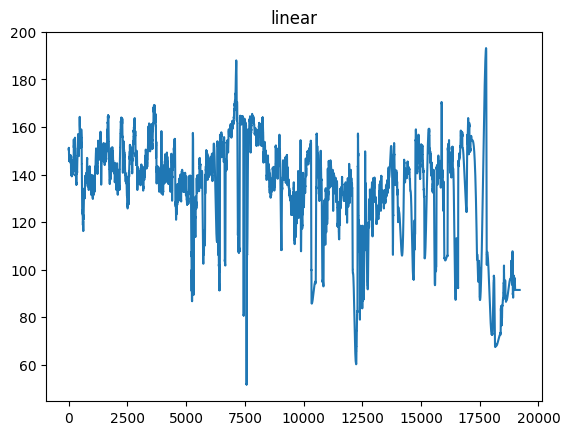

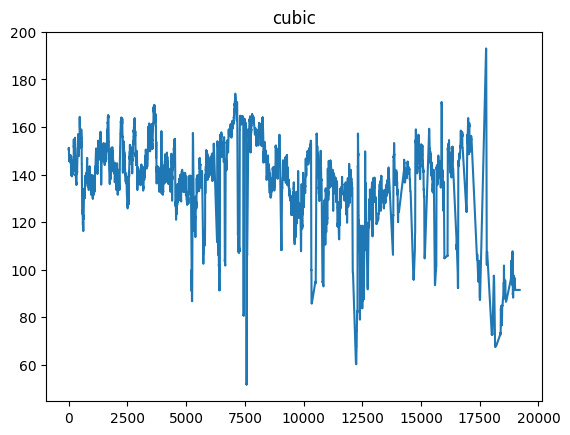

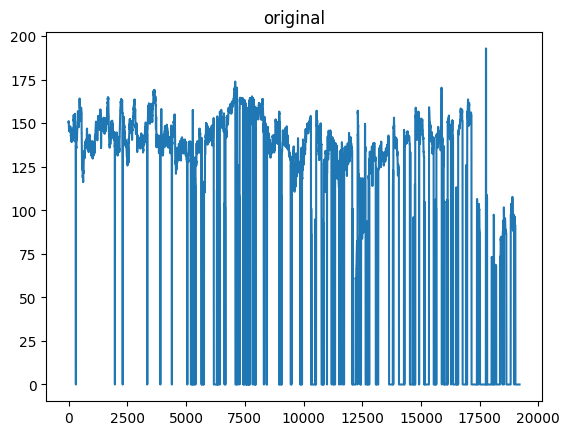

In [ ]:
plt.plot(linear)
plt.title("linear")
plt.show()
plt.plot(cubic)
plt.title("cubic")
plt.show()
plt.plot(record_1001.p_signal[:, 0])
plt.title("original")
plt.show()

In [ ]:
# prompt: create a pytorch tensor, in which first dimension is different records (indexed by record name), second dimension is: , fhr, uc, third dimension its the values of the fhr and uc
# so we have n(records)*2*maximum_len(fhr)

import torch

def create_pytorch_tensor(records,process = False):
    """
    Creates a PyTorch tensor from a dictionary of wfdb records.

    Args:
        records: A dictionary where keys are record names and values are wfdb.Record objects.

    Returns:
        A PyTorch tensor of shape (num_records, 2, max_signal_length)
        or None if input is invalid.
    """
    if not isinstance(records, dict):
        print("Error: Input must be a dictionary of wfdb records.")
        return None

    # Find maximum signal length for padding
    max_signal_length = 0
    for record in records.values():
      max_signal_length = max(max_signal_length, len(record.p_signal))

    num_records = len(records)
    tensor_data = []

    for record_name, record in records.items():
        # Pad signals to max length
        fhr = record.p_signal[:,0]
        if process:
          fhr = preprocess_fhr(fhr)
        uc = record.p_signal[:,1]
        fhr_padded = np.pad(fhr, (0, max_signal_length-len(fhr)), 'constant') # padding at the end, switch 0 and max_signal_length-len(fhr)
        uc_padded = np.pad(uc, (0, max_signal_length-len(uc)), 'constant')

        # Stack and append to list
        record_tensor = np.stack([fhr_padded, uc_padded], axis=0)
        tensor_data.append(record_tensor)

    # Convert the list of numpy arrays to a single numpy array
    tensor_data = np.array(tensor_data)
    # Convert to PyTorch tensor
    tensor = torch.tensor(tensor_data, dtype=torch.float32)
    return tensor

# Example usage assuming 'all_records' is your dictionary of wfdb records
# Replace this example with your actual records dictionary
#Example usage: Assuming all_records dictionary is available.
pytorch_tensor = create_pytorch_tensor(all_records)
pytorch_tensor_processed = create_pytorch_tensor(all_records, process = True)

if pytorch_tensor is not None:
  print(pytorch_tensor.shape)
    # Now you can use the pytorch_tensor for further processing.


torch.Size([552, 2, 21620])


In [ ]:
record_metadata = {}
for record in all_records.values():
    record_metadata[record.record_name] = extract_comments(record)

In [ ]:
# Important variables:

all_records; # Dictionary, {record_name: Record}
pytorch_tensor; # Pytorch tensor, [552, 2, 21620], records*(fhr,uc)*values, values padded at the end
pytorch_tensor_processed; # pPytorch tensor, [552, 2, 21620], fhr is proccessed - interpolated missing and extreme (<50 or >210) datapoints.
record_metadata; # Dictionary, {record_name: metadata}